In [8]:
# Importing required packages
import numpy as np
import pandas as pd 
import random


In [9]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

Essentially Azhar and brand team recommends to cluster the data using Conversion rate. Whereas I would cluster it using conversion rate and 

In [10]:
#Reading the Data
Data = pd.read_csv('ClusteringPromoNEWavg.csv')
#Dropping the index colum

In [11]:
Data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PromCat          49 non-null     object 
 1   PromMsg          49 non-null     object 
 2   CVR              49 non-null     float64
 3   GrossMarginPerc  49 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [12]:
Data.tail(5)

,PromCat,PromMsg,CVR,GrossMarginPerc
44,PersonalAcc,SaleDailyImpulse,0.010256,0.497216
45,PersonalAccToy,SaleCashDiscount30,0.007439,0.457896
46,Toy,SaleDailyImpulse,0.006596,0.561384
47,Trav,SaleCashDiscount20_40,0.014825,0.519510
48,Trav,SaleDailyImpulse,0.009038,0.535694


In [13]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

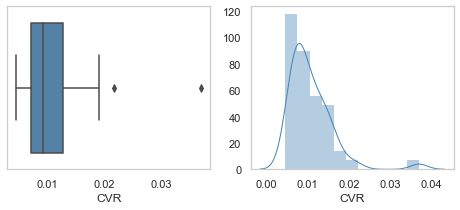

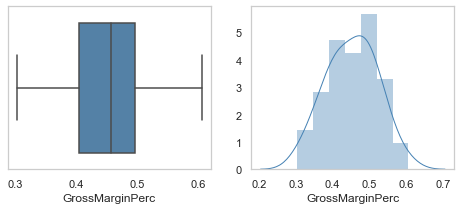

In [14]:
fig_num = 1        
for col in Data.select_dtypes(include=[np.number]).columns:
    if col in ['CVR','GrossMarginPerc']:
        hist_box_plot(Data,col, fig_num)
        fig_num = fig_num + 1

In [15]:
#Creating a function to plot Count plot
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

In [16]:
# Filter categorical variables
num_cols = Data._get_numeric_data().columns
cols = Data.columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['PromCat', 'PromMsg']

In [17]:
def biplot(df, x_name, y_name):
    fig, ax = plt.subplots()
    ax.grid(False)
    x = df[x_name]
    y = df[y_name]
    plt.scatter(x,y,c='blue', edgecolors='none',alpha=0.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('{x_name} vs. {y_name}'.format(x_name=x_name, y_name=y_name))
    plt.show()

In [ ]:
biplot(df=Data,x_name='GrossMarginPerc',y_name='CVR')


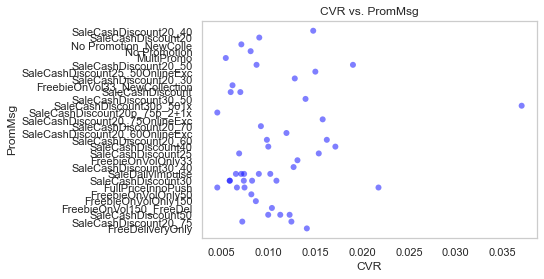

In [39]:
biplot(df=Data,x_name='CVR',y_name='PromMsg')


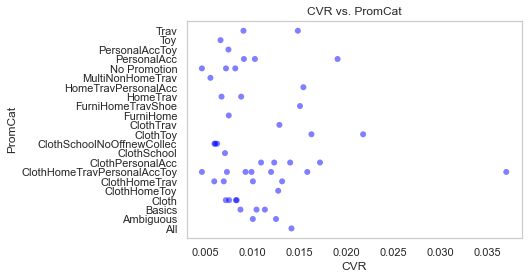

In [22]:
biplot(df=Data,x_name='CVR',y_name='PromCat')


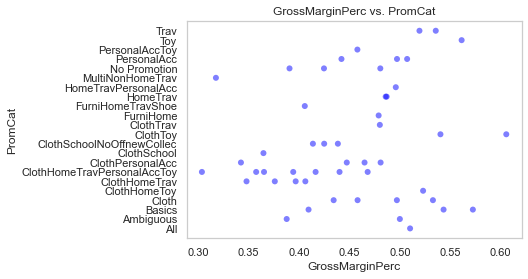

In [23]:
biplot(df=Data,x_name='GrossMarginPerc',y_name='PromCat')


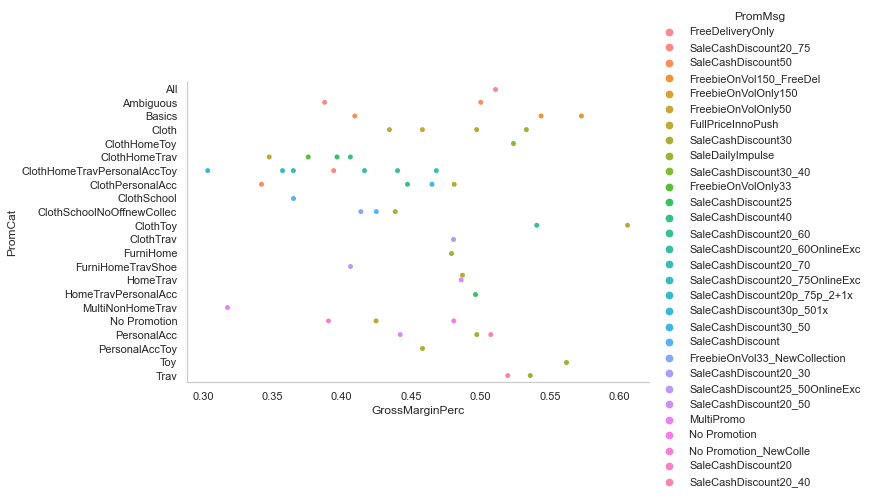

In [41]:
sns.catplot(x="GrossMarginPerc", y="PromCat", hue="PromMsg", kind="swarm", data=Data, legend_out=True, height=5, aspect=2)



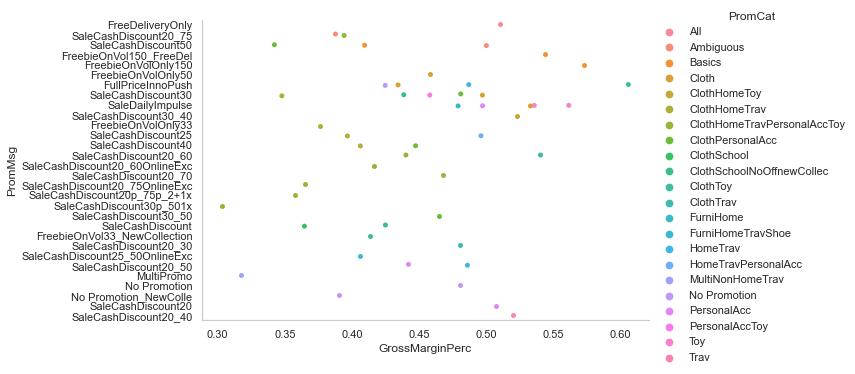

In [34]:
sns.catplot(x="GrossMarginPerc", y="PromMsg", hue="PromCat", kind="strip", data=Data, legend_out=True, height=5, aspect=2)


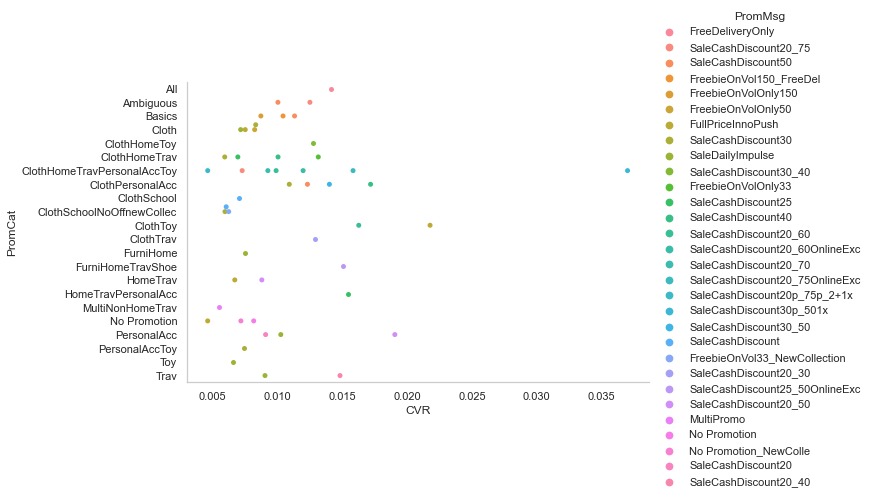

In [36]:
sns.catplot(x="CVR", y="PromCat", hue="PromMsg", kind="swarm", data=Data, legend_out=True, height=5, aspect=2)


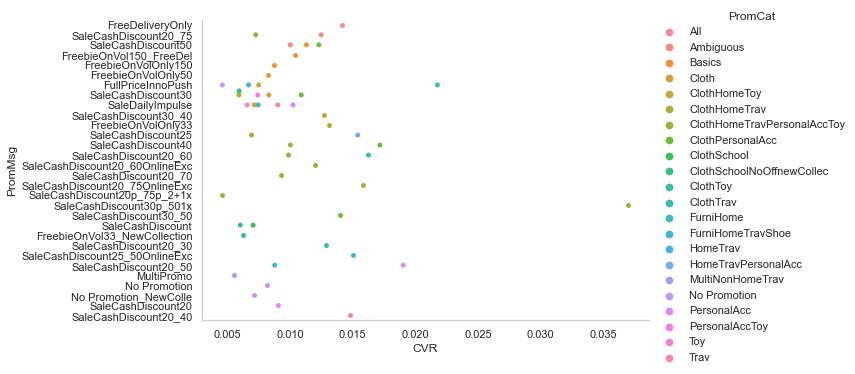

In [37]:
sns.catplot(x="CVR", y="PromMsg", hue="PromCat", kind="swarm", data=Data, legend_out=True, height=5, aspect=2)


In [42]:
# Standardizing all the numerical variables
from sklearn import preprocessing
Num_features=Data.select_dtypes(include=[np.number]).columns
Data[Num_features]=preprocessing.MinMaxScaler().fit_transform(Data[Num_features])



In [43]:
Data.tail()

,PromCat,PromMsg,CVR,GrossMarginPerc
44,PersonalAcc,SaleDailyImpulse,0.174108,0.640956
45,PersonalAccToy,SaleCashDiscount30,0.087128,0.510829
46,Toy,SaleDailyImpulse,0.061110,0.853311
47,Trav,SaleCashDiscount20_40,0.315147,0.714733
48,Trav,SaleDailyImpulse,0.136489,0.768294


In [44]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PromCat          49 non-null     object 
 1   PromMsg          49 non-null     object 
 2   CVR              49 non-null     float64
 3   GrossMarginPerc  49 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


In [45]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [52]:
#Use a random sample of Data for faster computation
Data = Data.sample(35,random_state=11)
Data.head()
#Resetting the indexs
Data=Data.reset_index(drop=True)

In [53]:
#Checking whether data can be clustered
Num_features =Data.select_dtypes(include=[np.number]).columns
hopkins(Data[Num_features])

#This test is run (code: (MATEVZKUNAVER, 2017)) on all the numerical variables of 
#the entire dataset and the test statistic we got is 0.74 which indicates that data has 
#a medium tendency to cluster.

0.785707996117653

In [54]:
finalDf_Cat = Data

In [59]:
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

y = kmeans.fit_predict(Data[['CVR', 'GrossMarginPerc']])

Data['Cluster'] = y

print(Data.head())

            PromCat                PromMsg       CVR  GrossMarginPerc  Cluster
0         Ambiguous     SaleCashDiscount50  0.167258         0.650340        0
1       PersonalAcc     SaleCashDiscount20  0.137954         0.674222        0
2          HomeTrav  SaleCashDiscount20_50  0.128955         0.603707        0
3  ClothPersonalAcc  SaleCashDiscount30_50  0.289902         0.534334        0
4             Cloth     SaleCashDiscount30  0.114327         0.640564        0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [60]:
Data

,PromCat,PromMsg,CVR,GrossMarginPerc,Cluster
0,Ambiguous,SaleCashDiscount50,0.167258,0.650340,0
1,PersonalAcc,SaleCashDiscount20,0.137954,0.674222,0
2,HomeTrav,SaleCashDiscount20_50,0.128955,0.603707,0
3,ClothPersonalAcc,SaleCashDiscount30_50,0.289902,0.534334,0
4,Cloth,SaleCashDiscount30,0.114327,0.640564,0
5,Trav,SaleDailyImpulse,0.136489,0.768294,0
6,Trav,SaleCashDiscount20_40,0.315147,0.714733,0
7,PersonalAcc,SaleDailyImpulse,0.174108,0.640956,0
8,ClothToy,SaleCashDiscount20_60,0.359836,0.783711,0
9,HomeTrav,FullPriceInnoPush,0.064474,0.606913,0


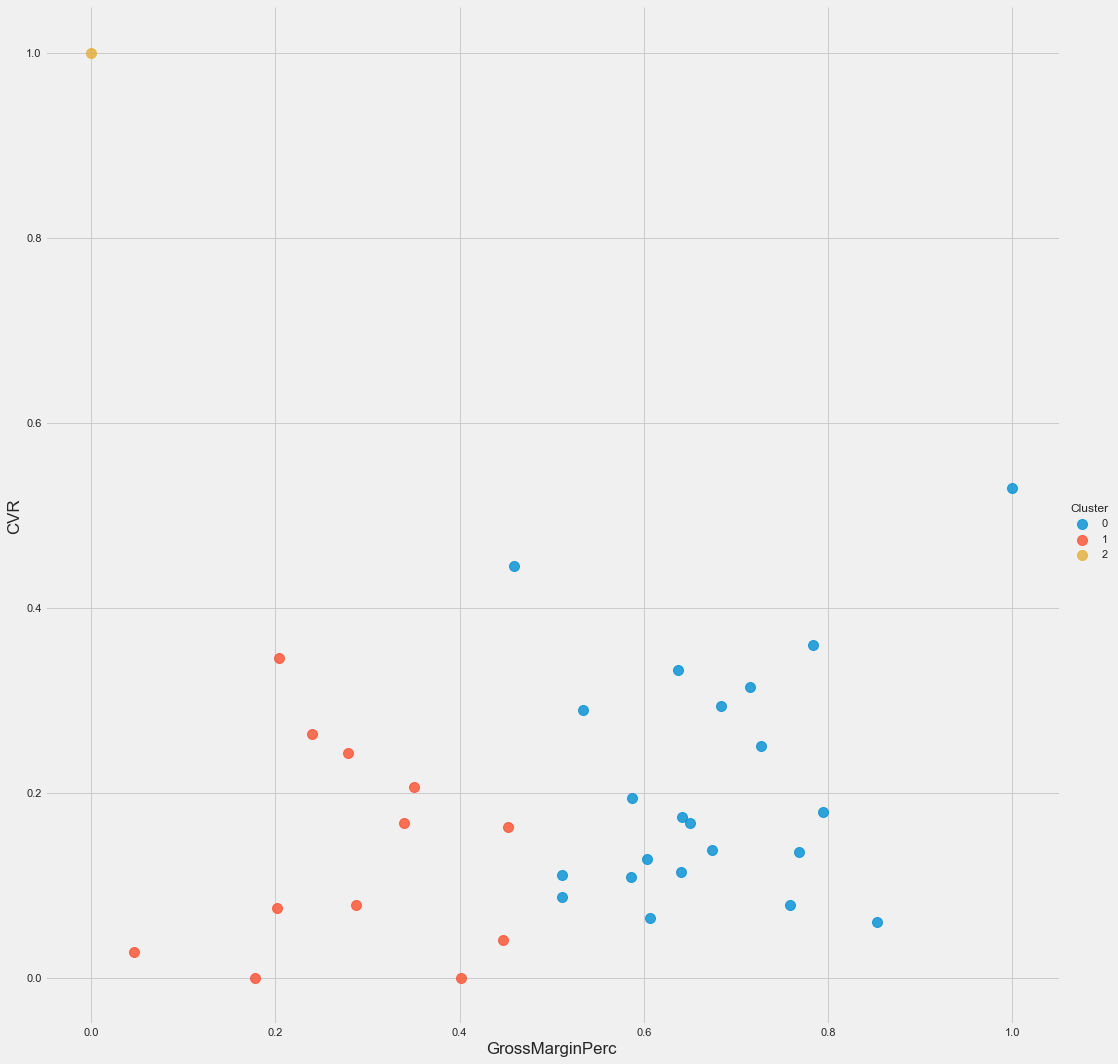

In [95]:

sns.lmplot('GrossMarginPerc', 'CVR', data=Data, fit_reg = False, hue = 'Cluster', size = 15, scatter_kws={"s": 100})

In [ ]:
sns.catplot(x="GrossMarginPerc", y="PromMsg", hue="PromCat", kind="strip", data=Data, legend_out=True, height=5, aspect=2)


In [61]:
# The lowest SSE value

kmeans.inertia_

0.982483301111611

In [62]:
# Final locations of the centroid

kmeans.cluster_centers_

array([[0.20745842, 0.66935085],
       [0.13454284, 0.28552885],
       [1.        , 0.        ]])

In [64]:
# The number of iterations required to converge
kmeans.n_iter_

3

In [65]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0], dtype=int32)

In [70]:
finalDf_Cat = finalDf_Cat[['CVR', 'GrossMarginPerc']]

In [71]:
 kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
   }
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(finalDf_Cat)
    sse.append(kmeans.inertia_)

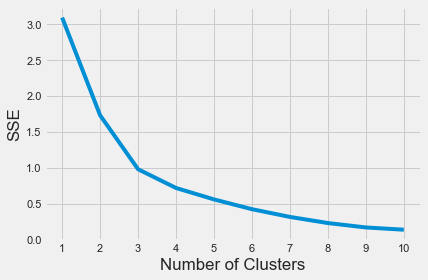

In [72]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [75]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

In [78]:
# Notice you start at 2 clusters for silhouette coefficient
from sklearn.metrics import silhouette_score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(finalDf_Cat)
    score = silhouette_score(finalDf_Cat, kmeans.labels_)
    silhouette_coefficients.append(score)

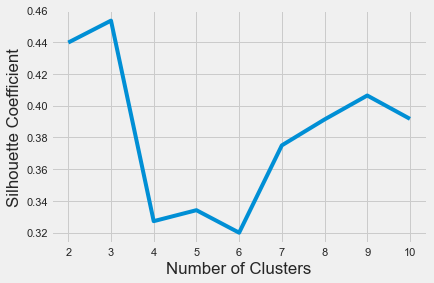

In [79]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [80]:
#Ultimately, your decision on the number of clusters to use should be guided by a combination of domain knowledge and clustering evaluation metrics.

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score


In [81]:
dbscan = DBSCAN(eps=0.3)
dbscan.fit(finalDf_Cat)


DBSCAN(eps=0.3)

In [82]:
# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    finalDf_Cat, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   finalDf_Cat, dbscan.labels_
).round (2)

In [90]:
finalDf_Cat

,CVR,GrossMarginPerc
0,0.167258,0.650340
1,0.137954,0.674222
2,0.128955,0.603707
3,0.289902,0.534334
4,0.114327,0.640564
5,0.136489,0.768294
6,0.315147,0.714733
7,0.174108,0.640956
8,0.359836,0.783711
9,0.064474,0.606913


In [84]:
kmeans_silhouette




0.39

In [85]:
dbscan_silhouette

0.66

In [86]:
#The silhouette coefficient is lower for the k-means algorithm. The DBSCAN algorithm appears to find more natural clusters according to the shape of the data